In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
def build_model(rate):
    # Создаем модель
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(2,)))  # Входной слой (2 признака)
    model.add(tf.keras.layers.Dense(3, activation='relu'))  # Первый скрытый слой
    model.add(tf.keras.layers.Dense(3, activation='softmax'))  # Выходной слой (3 класса)

    # Компиляция модели
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"]  # Можно использовать "accuracy" вместо RMSE для классификации
    )

    return model

In [ ]:
def train_model(model, feature, label, epochs, batch_size):
    history = model.fit(
        x=feature,  # Входные признаки
        y=label,    # Метки классов (one-hot)
        batch_size=batch_size,
        epochs=epochs
    )

    # Получаем веса модели
    trained_weights = model.get_weights()

    # Преобразуем историю обучения в Pandas DataFrame
    hist = pd.DataFrame(history.history)

    # Получаем значения ошибки (в history хранится "loss", а не "categorical_crossentropy")
    loss_values = hist["loss"]

    return trained_weights, history.history, loss_values

In [ ]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  plt.xlabel("feature")
  plt.ylabel("label")
# входные данные по оси x, выходные по оси y
  plt.scatter(feature, label)
# Модель линейной регрессии будет представлена красной линией
# с началом в (x0, y0) и концом в (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()


In [ ]:
def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()


In [ ]:
def generate_data(a, b, c, num_samples=100, x_range=(-5, 10), y_range=(-5, 10)):
    """
    Генерирует точки (x, y) и их классы в зависимости от положения относительно прямой ax + by + c = 0

    :param a: коэффициент a в уравнении прямой
    :param b: коэффициент b в уравнении прямой
    :param c: коэффициент c в уравнении прямой
    :param num_samples: количество точек
    :param x_range: диапазон значений x (кортеж)
    :param y_range: диапазон значений y (кортеж)
    :return: массив X (координаты) и y (метки классов в one-hot формате)
    """
    X = np.random.uniform(x_range[0], x_range[1], (num_samples, 2))

    # Определяем класс в зависимости от положения точки относительно прямой
    below_line = a * X[:, 0] + b * X[:, 1] + c < 0
    above_zero_y = X[:, 1] > 0
    right_of_zero_x = X[:, 0] > 0

    y = np.full(num_samples, 2)  # По умолчанию класс 2
    y[np.logical_and(below_line, np.logical_and(above_zero_y, right_of_zero_x))] = 0
    y[np.logical_or(~(above_zero_y), ~(right_of_zero_x))] = 1

    # Перекодируем метки классов в one-hot представление
    y_categorical = tf.keras.utils.to_categorical(y, num_classes=3)

    return X, y_categorical,y


<ipython-input-48-a69674764e72>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


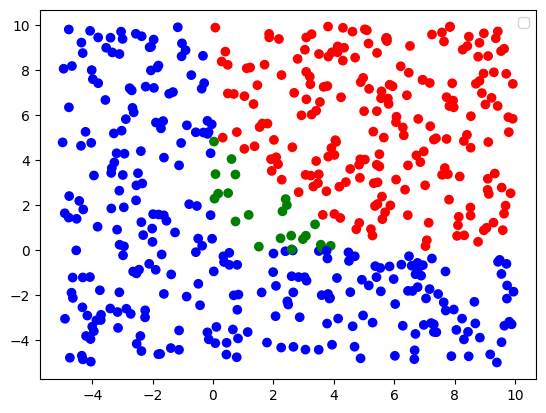

In [ ]:
a, b, c = 1, 1, -5  # Прямая x - y = 0
X, y,cls = generate_data(a, b, c, num_samples=500)
colors = ["green","blue","red"]

plt.scatter(X[:,0],X[:,1],c = [colors[np.argmax(i)] for i in y])
plt.legend()

In [ ]:
learning_rate=0.05 # выберем малую скорость обучения
epochs=50 # возьмем небольшое число эпох для обучения
my_batch_size=50 # задействуем все обучающие примеры за одну эпоху обучения.
my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs = train_model(my_model, X,
y, epochs,
my_batch_size)
print(trained_bias)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step - accuracy: 0.2240 - loss: 1.1007
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5440 - loss: 0.7925
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7040 - loss: 0.7362
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7320 - loss: 0.7107
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8340 - loss: 0.6791
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9140 - loss: 0.6319
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9200 - loss: 0.5809
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9120 - loss: 0.5281
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9260 - loss: 0.4785
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9240 - loss: 0.4376
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9340 - loss: 0.4040
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9320 - loss: 0.3771

In [ ]:
X=np.array([[3,3]])
my_model.predict(x=X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[4.1896041e-02, 1.4657034e-04, 9.5795745e-01]], dtype=float32)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


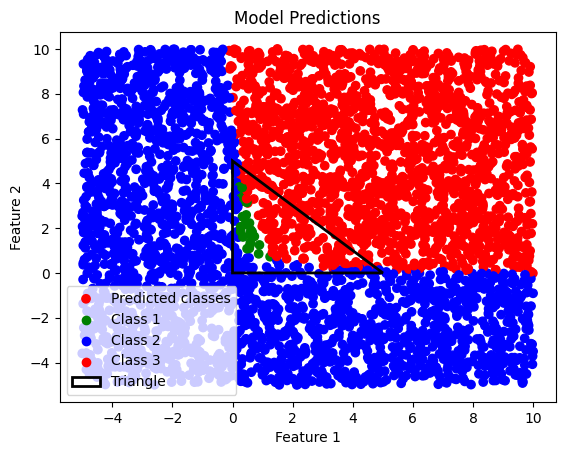

In [ ]:
X, y,_ = generate_data(a, b, c, num_samples=4000)

# Предсказания модели
y_pred = my_model.predict(X)  # Предполагаем, что модель возвращает one-hot векторы

# Преобразуем one-hot вектор в номер класса
y_pred_classes = np.argmax(y_pred, axis=1)

# Определяем цвета для классов
colors = ["green", "blue", "red"]

# Визуализация предсказаний
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y_pred_classes], marker='o', label="Predicted classes")

# Создаем легенду
for i, color in enumerate(colors):
    plt.scatter([], [], color=color, label=f'Class {i+1}')


triangle_vertices = np.array([[0, 0], [5, 0], [0, 5]])

# Отрисовка треугольника
triangle = plt.Polygon(triangle_vertices, edgecolor='black', facecolor='none', linewidth=2, label="Triangle")

plt.gca().add_patch(triangle)

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Model Predictions")

plt.show()

In [ ]:
def build_model_1(rate):
    # Создаем модель
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(2,)))  # Входной слой (2 признака)
    model.add(tf.keras.layers.Dense(24, activation='relu'))  # Первый скрытый слой
    model.add(tf.keras.layers.Dense(3, activation='softmax'))  # Выходной слой (3 класса)

    # Компиляция модели
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"]  # Можно использовать "accuracy" вместо RMSE для классификации
    )

    return model

In [ ]:
def train_model_1(model, feature, label, epochs, batch_size):
    history = model.fit(
        x=feature,  # Входные признаки
        y=label,    # Метки классов (one-hot)
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.5
    )

    # Получаем веса модели
    trained_weights = model.get_weights()

    # Преобразуем историю обучения в Pandas DataFrame
    hist = pd.DataFrame(history.history)

    epochs = history.epoch

    # Получаем значения ошибки (в history хранится "loss", а не "categorical_crossentropy")

    loss = hist["loss"]
    loss_values = hist["val_loss"]

    return trained_weights, history.history, epochs, loss, loss_values

In [ ]:
X, y,cls = generate_data(a, b, c, num_samples=500)

In [ ]:
learning_rate=0.2 # выберем малую скорость обучения
epochs=200 # возьмем небольшое число эпох для обучения
my_batch_size=50 # задействуем все обучающие примеры за одну эпоху обучения.
my_model = build_model_1(learning_rate)
trained_weight, trained_bias, epochs, loss, loss_values = train_model_1(my_model, X,
y, epochs,
my_batch_size)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6072 - loss: 2.9188 - val_accuracy: 0.8160 - val_loss: 1.0556
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8555 - loss: 0.6523 - val_accuracy: 0.9320 - val_loss: 0.1324
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8952 - loss: 0.1820 - val_accuracy: 0.9240 - val_loss: 0.1579
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8977 - loss: 0.3417 - val_accuracy: 0.9560 - val_loss: 0.0860
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9219 - loss: 0.1848 - val_accuracy: 0.9720 - val_loss: 0.0763
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9518 - loss: 0.1159 - val_accuracy: 0.9760 - val_loss: 0.0768
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9636 - loss: 0.1697 - val_accuracy: 0.9640 - val_loss: 0.0951
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9746 - loss: 0.0998 - val_accuracy: 0.9640 - val_loss:

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


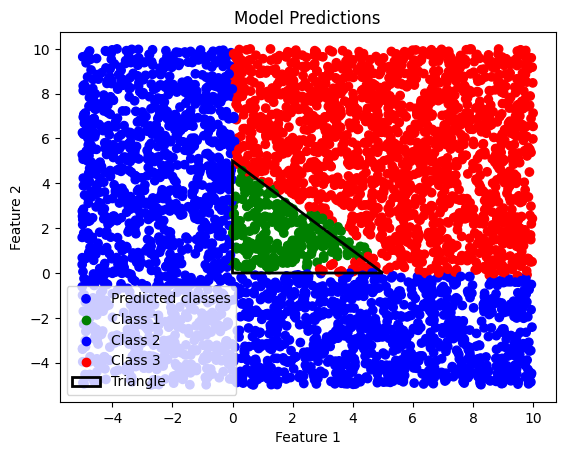

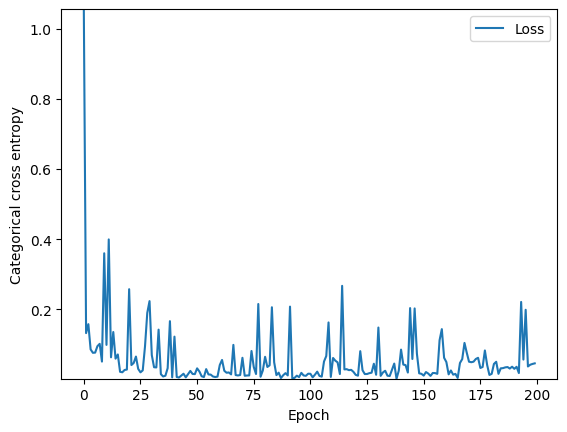

In [ ]:
X, y,_ = generate_data(a, b, c, num_samples=4000)

# Предсказания модели
y_pred = my_model.predict(X)  # Предполагаем, что модель возвращает one-hot векторы

# Преобразуем one-hot вектор в номер класса
y_pred_classes = np.argmax(y_pred, axis=1)

# Определяем цвета для классов
colors = ["green", "blue", "red"]

# Визуализация предсказаний
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y_pred_classes], marker='o', label="Predicted classes")

# Создаем легенду
for i, color in enumerate(colors):
    plt.scatter([], [], color=color, label=f'Class {i+1}')


triangle_vertices = np.array([[0, 0], [5, 0], [0, 5]])

# Отрисовка треугольника
triangle = plt.Polygon(triangle_vertices, edgecolor='black', facecolor='none', linewidth=2, label="Triangle")

plt.gca().add_patch(triangle)

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Model Predictions")

plt.show()

def plot_the_loss_curve(epochs, loss):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Categorical cross entropy")
  plt.plot(epochs, loss, label="Loss")
  plt.legend()
  plt.ylim([loss.min(), loss.max()])
  plt.show()


plot_the_loss_curve(epochs, loss_values)